In [117]:
import os 
import numpy as np
os.environ["KAGGLE_USERNAME"] = "danielgarciafallas"
os.environ["KAGGLE_KEY"] = "b05d09bcae866a8243ef73f9c47ea4dd"

In [118]:
base_dir = os.path.dirname(os.getcwd())
covid_images_path = base_dir+"/COVID-19_Radiography_Dataset/COVID/images"
normal_images_path = base_dir+"/COVID-19_Radiography_Dataset/Normal/images"
lung_opacity_images_path = base_dir+"/COVID-19_Radiography_Dataset/Lung_Opacity/images"
viral_pneumonia_images_path = base_dir+"/COVID-19_Radiography_Dataset/Viral Pneumonia/images"

In [119]:
print(len((os.listdir(covid_images_path))))
print(len((os.listdir(normal_images_path))))
print(len((os.listdir(lung_opacity_images_path))))
print(len((os.listdir(viral_pneumonia_images_path))))

3616
10192
6012
1345


(299, 299, 3)


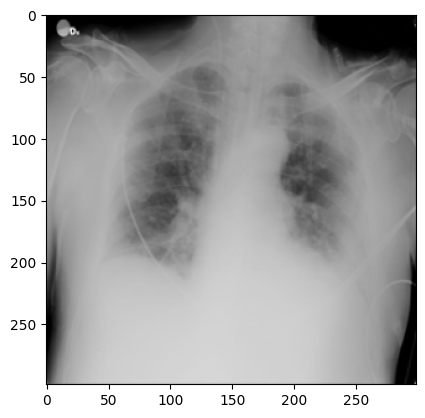

In [120]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(covid_images_path+"/COVID-1.png")
plt.imshow(img)
print(img.shape)

(120, 120, 3)


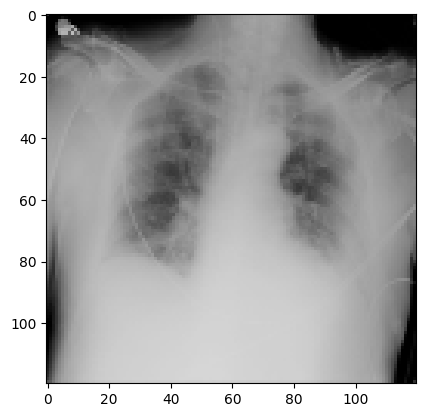

In [121]:
img = cv2.imread(covid_images_path+"/COVID-1.png")
img_resized = cv2.resize(img,(120,120))
plt.imshow(img_resized)
print(img_resized.shape)

### Feature Engineering
* resize (100,100)
* normalization data/225.0


In [122]:
def loadImages(path, urls, target):
    images = []
    labels = []
    for i in range(len(urls)):
        img_path = path+"/"+urls[i]
        # normalization
        img = cv2.imread(img_path) / 225.0
        # to rezise images
        img = cv2.resize(img,(120,120))
        images.append(img)
        labels.append(target)
    
    return np.asarray(images),labels

### Loading data

##### Target Labels
* 0 : normal
* 1 : covid
* 2 : lung opacity
* 3 : viral pneumonia

In [123]:
normalImages,normalTargets = loadImages(normal_images_path,os.listdir(normal_images_path),0)
covidImages,covidTargets = loadImages(covid_images_path,os.listdir(covid_images_path),1)
lungImages,lungTargets = loadImages(lung_opacity_images_path,os.listdir(lung_opacity_images_path),2)
viralImages,viralTargets = loadImages(viral_pneumonia_images_path,os.listdir(viral_pneumonia_images_path),3)

In [124]:
print(normalImages.shape)
print(covidImages.shape)
print(lungImages.shape)
print(viralImages.shape)

(10192, 120, 120, 3)
(3616, 120, 120, 3)
(6012, 120, 120, 3)
(1345, 120, 120, 3)


### Creating df

In [125]:
data = np.r_[normalImages,covidImages,lungImages,viralImages]
targets = np.r_[normalTargets,covidTargets,lungTargets,viralTargets]

### Dividing the train and test data
##### We choose
* 20% testing
* 80% training

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2)